In [2]:
##A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
##Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 


In [9]:
###importing some lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [13]:
### importing data set
company=pd.read_csv("C:/Users/Vijay Rathod/Downloads/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
#### using EDA
company.shape

(400, 11)

In [15]:

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [20]:
company[company.duplicated()] #### hence there is no duplicted values

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [21]:
company.isnull().sum() #### there is no null values in given data set

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [26]:
# Changing the categorical columns into numeric one 
company1 = pd.get_dummies(company)
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [60]:
#### Since company is interested to know about the segment or attributes causes high sale. 
company1['Category'] = pd.cut(company1['Sales'], 
                        bins=[0,10,np.inf], 
                        labels=['Low/Mid','High'],
                       include_lowest=True)
company1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Low/Mid
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low/Mid
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low/Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Low/Mid
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Low/Mid
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Low/Mid


In [68]:
### So the applied category here is Y variable and rest all are X variables, hence applying the LableEncoding to Y.
label_encoder=preprocessing.LabelEncoder()
company1['Category']=label_encoder.fit_transform(company1['Category'])

In [71]:
X=company1.iloc[:,1:15]
Y=company1.iloc[:,15]

In [72]:
### Now spliting our data into training and testing data set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [73]:
### Buliding Descion tree
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

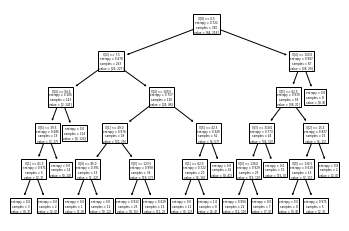

In [74]:
### Ploting Tree
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy Criteria')

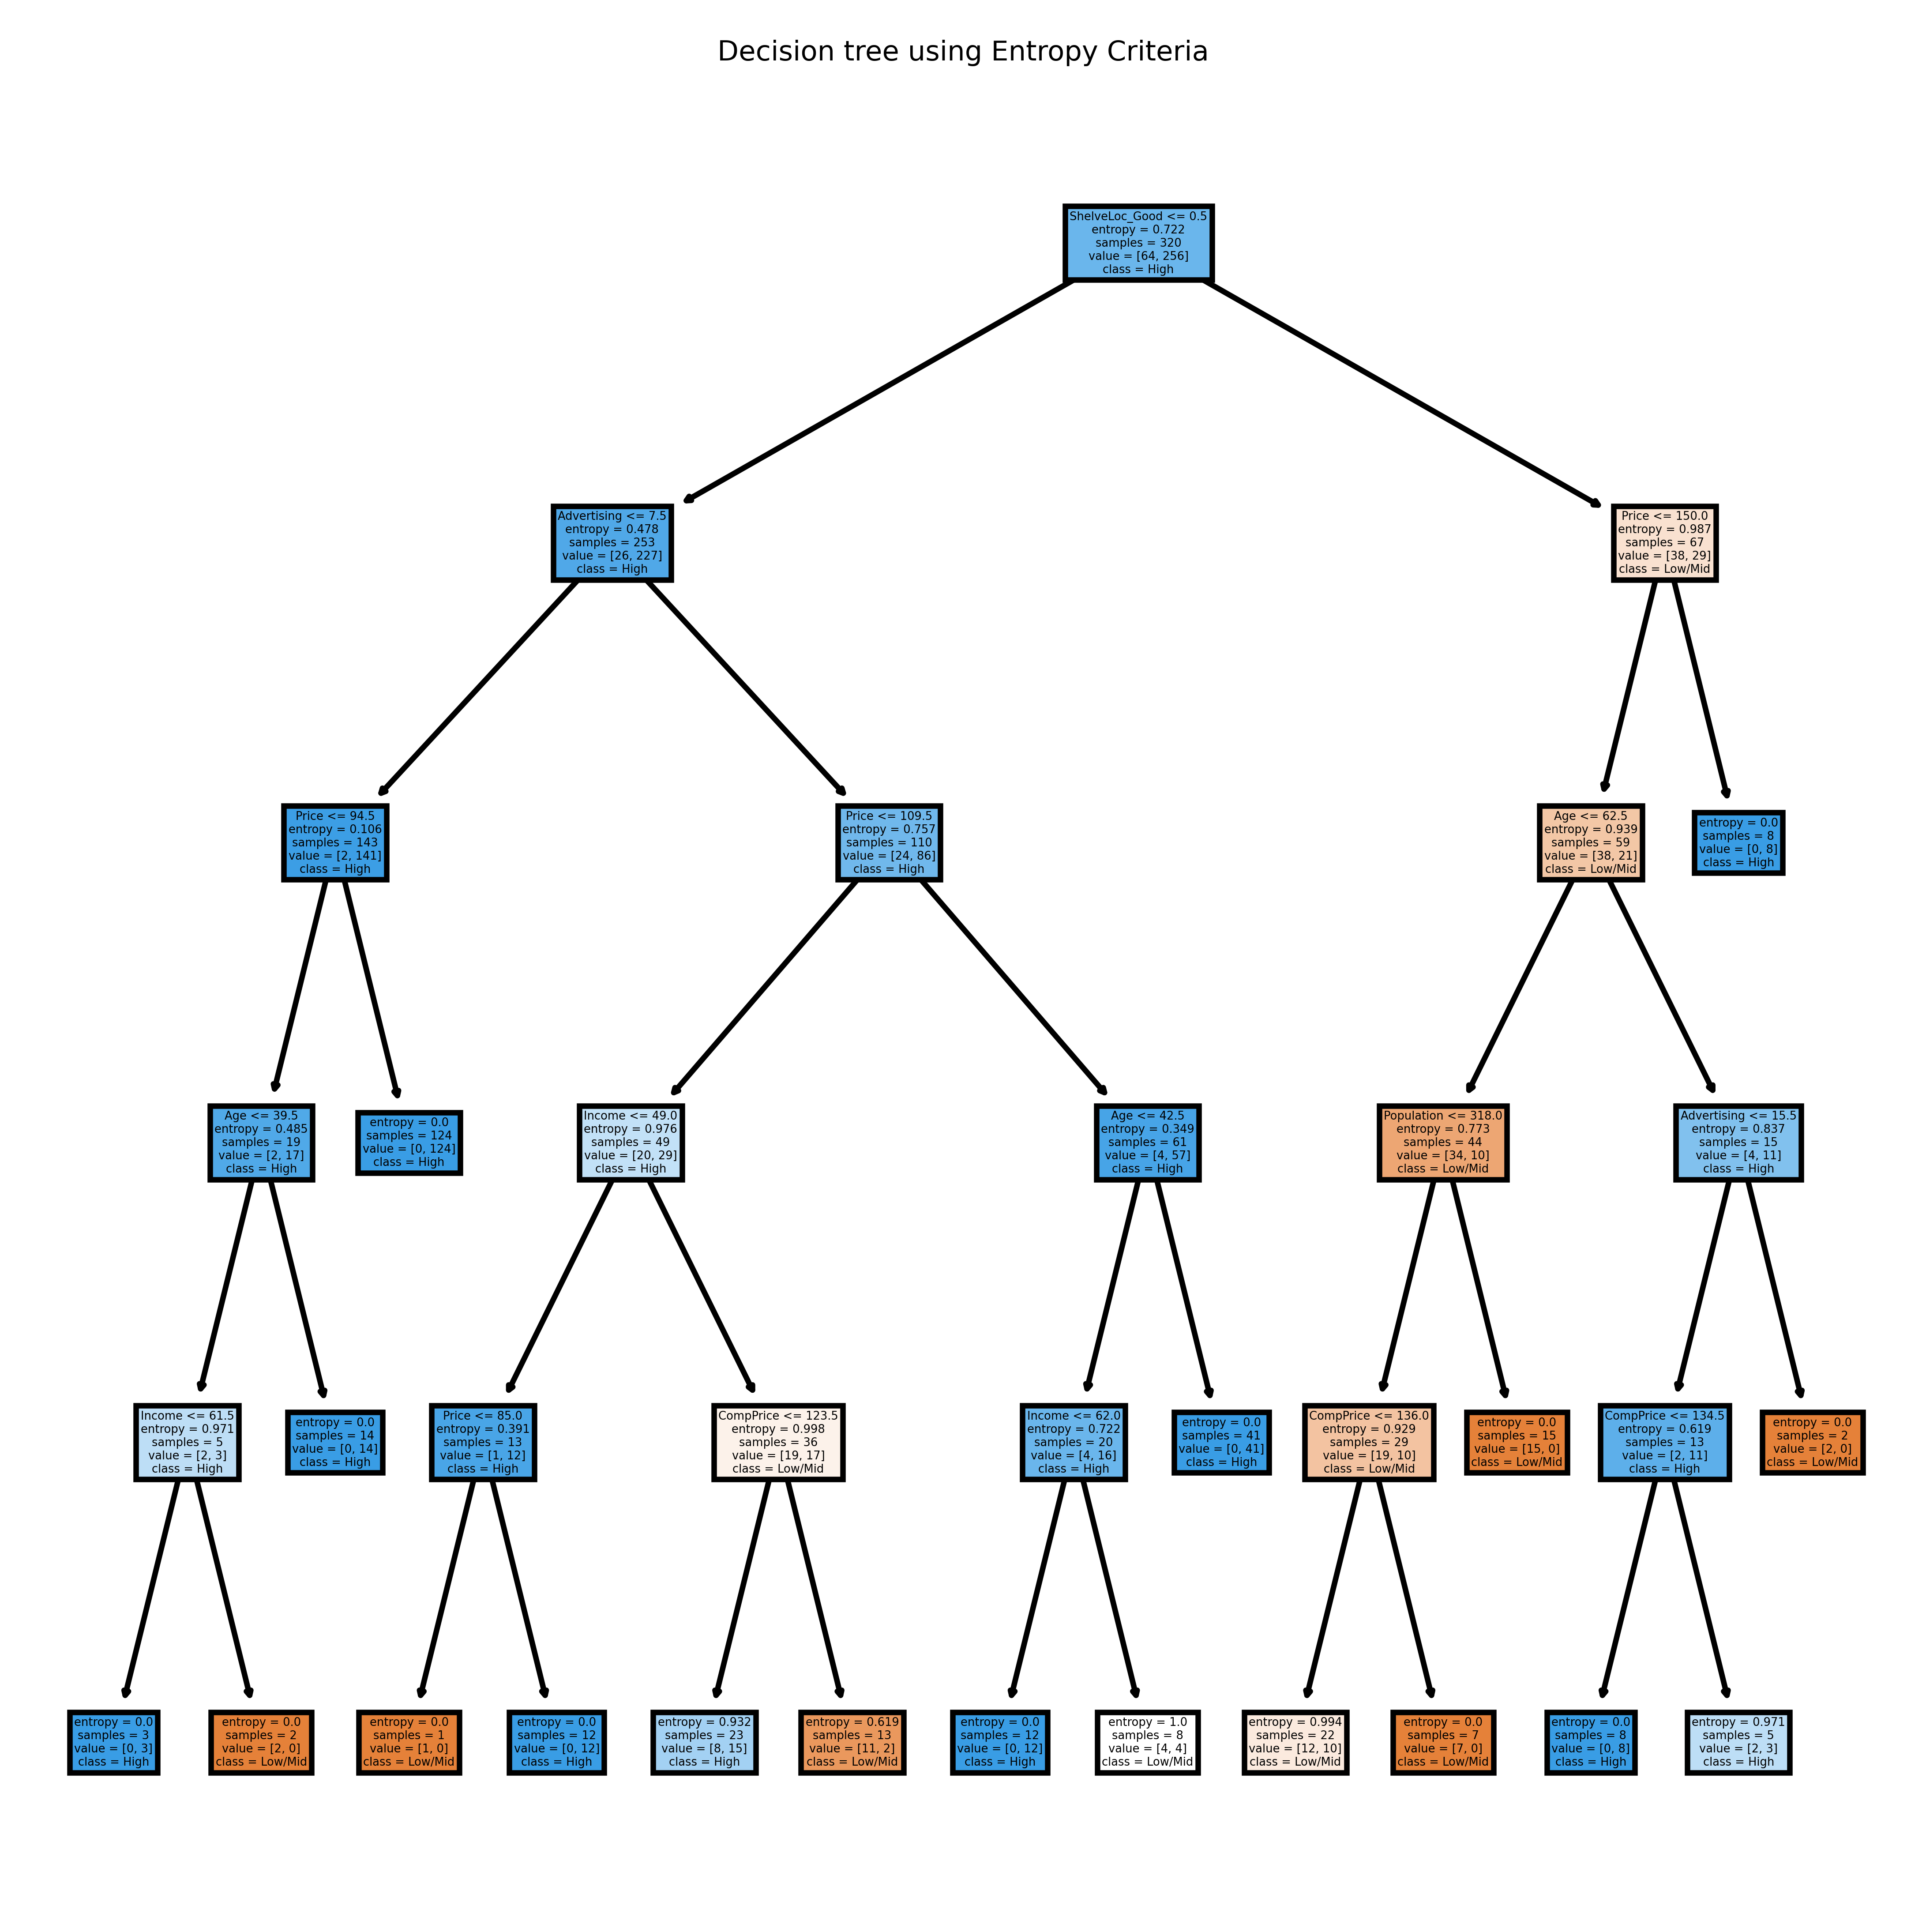

In [75]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education',
    'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low/Mid', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.title('Decision tree using Entropy Criteria',fontsize=5)

In [76]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 


In [77]:
pd.Series(preds).value_counts() # getting the count of each category 

1    62
0    18
dtype: int64

In [78]:
pd.crosstab(y_test,preds)## geting 2 way table

col_0,0,1
Category,,
0,9,5
1,9,57


In [79]:
### Accuracy
np.mean(preds==y_test)

0.825

In [80]:
### CART

In [81]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [82]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

Text(0.5, 1.0, 'Decision tree using GINI')

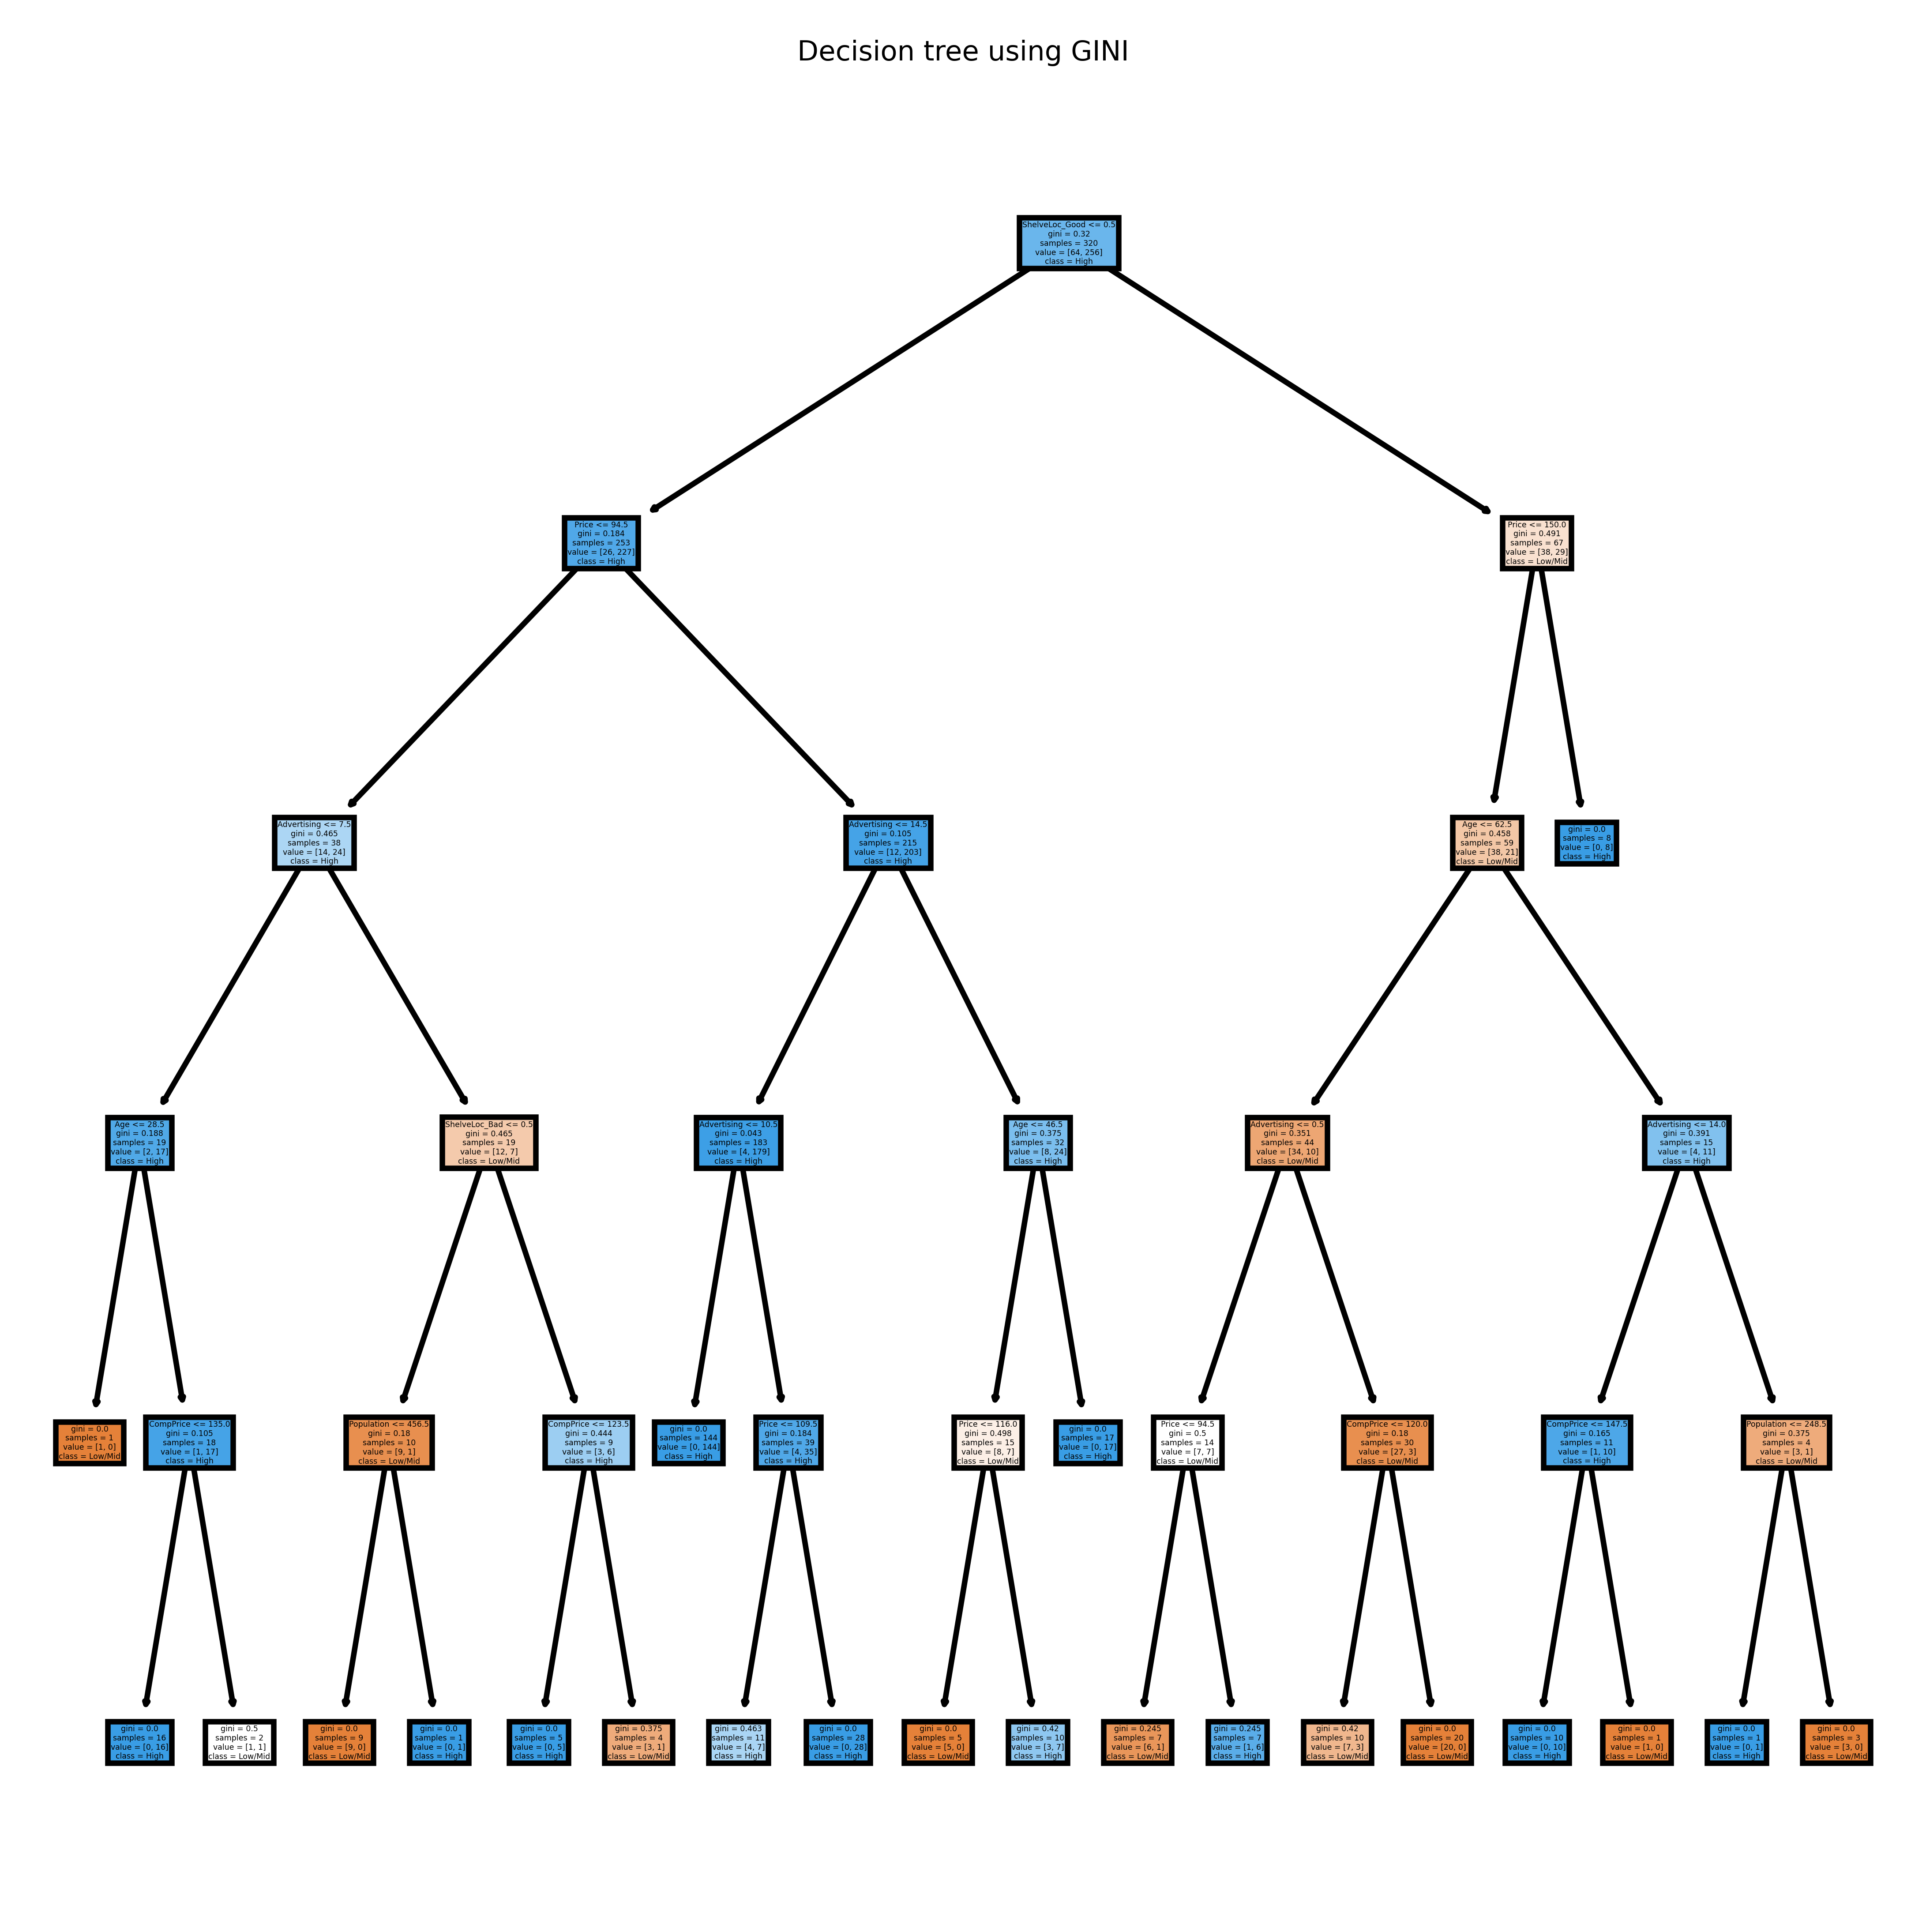

In [84]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education',
    'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['Low/Mid', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=900)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);
plt.title('Decision tree using GINI',fontsize=5)

In [87]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.825

In [88]:
### By seeing Both the Decision tree we can say that "Shelf Location at stores,Pricing,Advertising" are
### top factors affecting the cloth manufacturing company sales